# Unit Testing
Unit testing refers to tests that verify the functionality of a code unit, typically a function. Asserts are a quick way to test a piece of code but they don’t provide us with much detail (e.g. how different is the result we obtained from the expected one?). Luckily, Python provides us with a specific module for unit testing: unittest.

<b> IMPORTANT </b>
If you are in a notebook, we need to invoke the module explicitly: 
#unittest.main(argv=[''], verbosity=2, exit=False)

This at every block or chunck:

unittest.main(argv=['first-arg-is-ignored'], exit=False)


In [9]:
import unittest
unittest.main(argv=['first-arg-is-ignored'], exit=False)

def fibonacci(n):
    lst = []
    for i in range(0, n):
        if(i <= 1):
            lst.append(1)
        else:
            lst.append(lst[i-2] + lst[i-1])
    return(lst)

print("Fibonacci(5):", fibonacci(5))

class FibonacciTest(unittest.TestCase):

    def test_listLength(self):
        self.assertEqual(len(fibonacci(4)), 4)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


Fibonacci(5): [1, 1, 2, 3, 5]


# Measuring Time

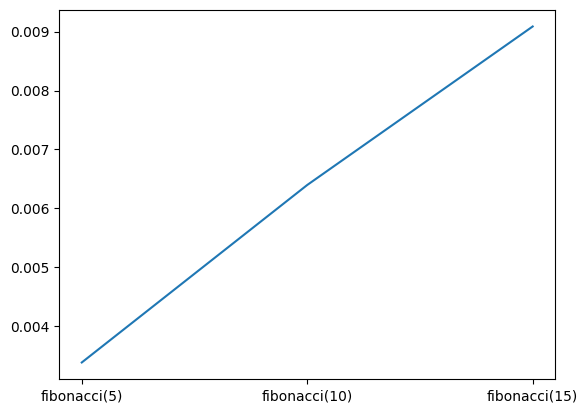

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit

def fibonacci(n):
    if isinstance(n, int):
        if n > 0:
            lst = []
            for i in range(0, n):
                if(i <= 1):
                    lst.append(1)
                else:
                    lst.append(lst[i-2] + lst[i-1])
            return(lst)
        else:
            raise(ValueError)
    else:
        raise(TypeError)

# setup ensures that timeit can access specific functions from your local environment
timeit.timeit('fibonacci(5)', number=10000, setup="from __main__ import fibonacci")

times = []
times.append(timeit.timeit('fibonacci(5)', number=10000, setup="from __main__ import fibonacci"))
times.append(timeit.timeit('fibonacci(10)', number=10000, setup="from __main__ import fibonacci"))
times.append(timeit.timeit('fibonacci(15)', number=10000, setup="from __main__ import fibonacci"))

timeSeries = pd.Series(times)
timeSeries.plot()
# to change x labels...
plt.xticks([0, 1, 2], ['fibonacci(5)', 'fibonacci(10)', 'fibonacci(15)'])
plt.show()
plt.close()